# 01: Quantum Information Processing in QuTiP I

In this tutorial, we'll take a look at QuTiP's features for building quantum circuits and quantum gates.

## Tasks

- [Import qutip and qutip.qip](#imports)
- [Build and run a circuit with a single qubit and a Hadamard gate](#build-and-run-a-circuit-with-a-single-qubit-and-a-hadamard-gate)
- [Build a circuit that prepares a Bell state](#build-a-circuit-that-prepares-a-bell-state)
- [Now make circuits that prepare each of the four Bell basis states](#now-make-circuits-that-prepare-each-of-the-four-bell-basis-states)
- [Add measurements to a circuit](#add-measurements-to-a-circuit)
- [Quantum teleportation](#quantum-teleportation)

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import qutip
import qutip.qip as qip
import qutip.qip.operations as qip_ops
import qutip.qip.circuit as qip_circuit
import numpy as np

## Helper functions

In [3]:
def display_list(a, title=None):
    """ Display a list of items using Jupyter's display function. """
    if title:
        print(title)
        print("=" * len(title))
    for item in a:
        display(item)

In [4]:
def show_bloch(states, vector_color=None, vector_alpha=None): # unused
    """ Show states or density matrices on the Bloch sphere. """
    bloch = qutip.Bloch()
    bloch.add_states(states)
    if vector_color is not None:
        if vector_color == "rb":
            vector_color = [
                (c, 0, 1 - c) for c in np.linspace(0.1, 1.0, len(states))
            ]
        bloch.vector_color = vector_color
    if vector_alpha is not None:
        bloch.vector_alpha = vector_alpha
    bloch.show()

In [5]:
def display_circuit_statistics(qc, state, ptrace=None):
    result = qc.run_statistics(state=state)
    print("Final qubit states")
    print("==================")
    for p, state, cbits in zip(result.probabilities, result.final_states, result.cbits):
        print("Probability:", p)
        if ptrace is not None:
            state = state.ptrace(ptrace)
        display(state)
        print("Classical bit values:", cbits)

## Build and run a circuit with a single qubit and a Hadamard gate

- One creates a circuit with `qip_circuit.QubitCircuit`
- A gate can be added to a circuit using `.add_gate(NAME_OF_GATE, target=QUBIT_TO_TARGET)`
- The qubit name for the Hadamard gate is `SNOT`.
- Displaying a gate should print a nice circuit diagram in your notebook
- When you get stuck try `qip_circuit.QubitCircuit?` in a new notebook cell -- this will show the documentation!
- The `?` also works for any other class, object or method.
- Once you've built the circuit, call `.run(...)` to try it out on the two basis states.

In [6]:
qc = qip_circuit.QubitCircuit(N=1)
qc.add_gate("SNOT", targets=0)
qc

In [7]:
q0 = qutip.ket("0")
q1 = qutip.ket("1")

qc.run(state=q0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [8]:
qc.run(state=q1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]

## Build a circuit that prepares a Bell state

- This circuit should have two qubits.
- Used |00> as your initial state.
- Run the circuit and check the result.
- Start with a simple circuit with no gates and then modify it. Run different versions to see what they do.
- Then modify it step by step making it a bit less wrong each time.
- You can create the state |00> using `qutip.ket("00")`, but feel free to try other ways too.

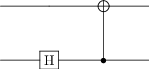

In [9]:
qc = qip_circuit.QubitCircuit(N=2)
qc.add_gate("SNOT", targets=0)
qc.add_gate("CNOT", controls=0, targets=1)
qc

In [10]:
q00 = qutip.ket("00")

In [11]:
qc.run(q00)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

## Now make circuits that prepare each of the four Bell basis states

The Bell basis states are:

$$ |\Phi ^{+}\rangle ={\frac {1}{{\sqrt {2}}}}(|0\rangle _{A}\otimes |0\rangle _{B}+|1\rangle _{A}\otimes |1\rangle _{B}) $$

$$ |\Phi ^{-}\rangle ={\frac {1}{{\sqrt {2}}}}(|0\rangle _{A}\otimes |0\rangle _{B}-|1\rangle _{A}\otimes |1\rangle _{B}) $$

$$ |\Psi ^{+}\rangle ={\frac {1}{{\sqrt {2}}}}(|0\rangle _{A}\otimes |1\rangle _{B}+|1\rangle _{A}\otimes |0\rangle _{B}) $$

$$ |\Psi ^{-}\rangle ={\frac {1}{{\sqrt {2}}}}(|0\rangle _{A}\otimes |1\rangle _{B}-|1\rangle _{A}\otimes |0\rangle _{B}) $$

Use |00> as your initial state again.

If you get stuck, think about how to modify the circuits you've used already to get the desired state.

Some other gates you might need are `CSIGN` and `X`.

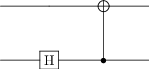

In [12]:
# Phi+: The first Bell basis state that we've already prepared
qc_phi_p = qip_circuit.QubitCircuit(N=2)
qc_phi_p.add_gate("SNOT", targets=0)
qc_phi_p.add_gate("CNOT", controls=0, targets=1)
qc_phi_p

In [13]:
qc_phi_p.run(q00)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

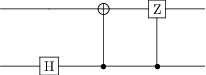

In [14]:
# Phi-: Like Phi+ but with the sign of the |11> part of the state flipped.
qc_phi_m = qip_circuit.QubitCircuit(N=2)
qc_phi_m.add_gate("SNOT", targets=0)
qc_phi_m.add_gate("CNOT", controls=0, targets=1)
qc_phi_m.add_gate("CSIGN", controls=0, targets=1)
qc_phi_m

In [15]:
qc_phi_m.run(q00)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]]

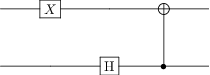

In [16]:
# Psi+: Now the two bits are always anti-aligned
qc_psi_p = qip_circuit.QubitCircuit(N=2)
qc_psi_p.add_gate("X", targets=1)
qc_psi_p.add_gate("SNOT", targets=0)
qc_psi_p.add_gate("CNOT", controls=0, targets=1)
qc_psi_p

In [17]:
qc_psi_p.run(q00)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]

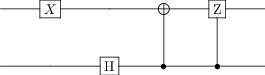

In [18]:
# Psi-: Now the two bits are always anti-aligned AND there is a minus on the second part
qc_psi_m = qip_circuit.QubitCircuit(N=2)
qc_psi_m.add_gate("X", targets=1)
qc_psi_m.add_gate("SNOT", targets=0)
qc_psi_m.add_gate("CNOT", controls=0, targets=1)
qc_psi_m.add_gate("CSIGN", controls=0, targets=1)
qc_psi_m

In [19]:
qc_psi_m.run(q00)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]

## Add measurements to a circuit

The next task is to add a measurement to our circuit.

In order to store the measurement result, we need to add classical bits. The same way we had `N` for the number of qubits, we'll add `num_cbits=1` (or 2, 3, etc) to specify the number of classical bits our circuit will use. This goes into the call to create the circuit, e.g. `QubitCircuit(..., num_cbits=1)`.

Now that we have somewhere to store the result, we can add a measurement to our circuit by calling `.add_measurement(LABEL, targets=QUBIT_INDEX, classical_store=CLASSICAL_BIT_INDEX)`.

The measurements are a little like gates, but there are some big differences. A measurement collapses a the state of a qubit to either the |0> or the |1> state. From that point onwards, the circuit has *two* possible quantum states. Adding another measurement doubles the number of possible outcomes to four. Adding a third brings the total to eight, and so.

There are two ways to run a circuit with measurement, and you should try out both:

- `.run(...)` returns just the final state. It's the equivalent of running a real circuit on a quantum device once. You'll also hear people refer to this as a "single shot". You can provide a list via `cbits=` to return the classical measurement results from this one run.

- `.run_statistics(...)` returns all possible final states along with their probabilities and the corresponding values of the classical bits. Very useful when wanting to understand the behaviour of small circuits quickly. The returned result has attributes `.probabilites`, `.final_states` and `.cbits`. Each of these are lists with one entry for each possible outcome.

Start with a simple circuit with just one qubit, one classical bit, a single Hadamard gate and single measurement. One you've explored that fully, you can try add some measurements to your Bell state circuits from the previous section.

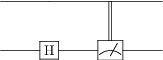

In [20]:
# Create a simple circuit with a single measurement
qc = qip_circuit.QubitCircuit(N=1, num_cbits=1)
qc.add_gate("SNOT", targets=0)
qc.add_measurement("M0", targets=0, classical_store=0)
qc

In [21]:
# Run a single shot and capture the final qubit state and the value of the classical bits
# Run this cell multiple times to see the two possible outcomes
classical_store = [None]
final_state = qc.run(q0, cbits=classical_store)

print("Finale state:")
display(final_state)
print("Classical bits:", classical_store)

Finale state:


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Classical bits: [0]


In [22]:
# Determine all possible outcomes and their probabilities
result = qc.run_statistics(state=q0)

In [23]:
display_list(result.final_states)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [24]:
result.probabilities

[0.4999999999999999, 0.4999999999999999]

In [25]:
result.cbits

[[0], [1]]

In [26]:
display_circuit_statistics(qc, q0)

Final qubit states
Probability: 0.4999999999999999


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Classical bit values: [0]
Probability: 0.4999999999999999


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

Classical bit values: [1]


## Quantum teleportation

You should have coverted the quantum teleportation protocol in the lectures, but if you need a refresher you can find a excellent pair for videos by Michael Nielsen on YouTube:

- [Quantum teleportation](https://www.youtube.com/watch?v=3wZ35c3oYUE)
- [Quantum teleportation discussion](https://www.youtube.com/watch?v=Yfk7J1kBegw)

Start simply by determining the basics:

- How many qubits will your circuit need?
- How many measurements will need to be performed?
- How many classical bits will be needed to store the measurement outcomes?
- Write down the steps of the protocol for yourself.
- Implement each of the small steps and check the outcomes match what you expect.

Right at the end of the protocol we need to apply a gate based on the outcome of the measurements:

- $|00⟩ \rightarrow $ no operation
- $|01⟩ \rightarrow Z$
- $|10⟩ \rightarrow X$
- $|11⟩ \rightarrow ZX$

We haven't seen how to do this yet, but QuTiP provides an option for it:

```python
qc.add_gate("X", targets=[2], classical_controls=[0])
```

This will apply an `X` gate to qubit `2`, only if the value of the zeroth classical bit is `1`. Try it out in a simpler circuit first.

When you look at the final result, you'll be looking at all three qubits, so you'll need take a partial trace to see just the qubit that the initial state has been teleported to.

For AFTER the tutorial:

- You can find a great worked example of teleportation in the [QuTiP tutorials](https://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/teleportation.ipynb). Do not read it now! Use it as a reference later on when you're revisiting this tutorial or want to remember the details of the protocol again.

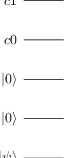

In [27]:
# Create an empty circuit with three qubits and two classical bits
tc = qip_circuit.QubitCircuit(3, num_cbits=2, input_states=["\psi", "0", "0", "c0", "c1"])
tc

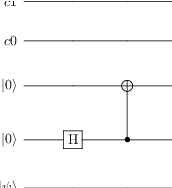

In [28]:
# Add the gates to create a bell pair between the second and third qubit
# After this, Alice and Bob separate, with Alice taking qubits 0 and 1, and Bob qubit 2
tc.add_gate("SNOT", targets=[1])
tc.add_gate("CNOT", targets=[2], controls=[1])
tc

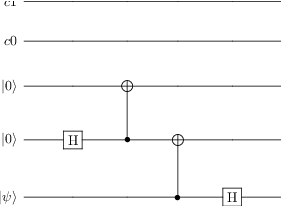

In [29]:
# Alice then interacts the qubit 0 (psi) with qubit 1
tc.add_gate("CNOT", targets=[1], controls=[0])
tc.add_gate("SNOT", targets=[0])
tc

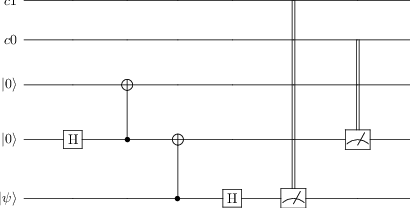

In [30]:
# Alice and Bob then measure qubits 1 and 2, respectively.
tc.add_measurement("M0", targets=[0], classical_store=1)
tc.add_measurement("M1", targets=[1], classical_store=0)
tc

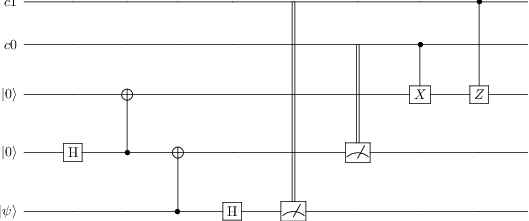

In [31]:
# Alice sends her measurement results to Bob (e.g. via an ordinary phone call)
# Bob uses the combination of measurement results to return qubit 2 to the intial state of psi
tc.add_gate("X", targets=[2], classical_controls=[0])
tc.add_gate("Z", targets=[2], classical_controls=[1])
tc

In [32]:
# Now that we have the circuit, let's run the teleportation protocol!
# Try changing the initial value of psi (qubit 0) and seeing what happens.
# Remember that qubit 1 and 2 need to start in state |0>. See what happens if they don't.
psi = qutip.ket("0")
qbits = [psi, qutip.ket("0"), qutip.ket("0")]
initial_state = qutip.tensor(qbits)
display_circuit_statistics(tc, initial_state, ptrace=[2])

Final qubit states
Probability: 0.24999999999999994


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Classical bit values: [0, 0]
Probability: 0.24999999999999994


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Classical bit values: [1, 0]
Probability: 0.24999999999999994


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Classical bit values: [0, 1]
Probability: 0.24999999999999994


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Classical bit values: [1, 1]


## Using functions to make your notebooks neater

- Write a function for displaying the run_statistics of a given circuit and initial state

In [33]:
# See the helper functions at the top for examples.